In [1]:
!head listings.csv

id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,cal

In [2]:
from csv import DictReader

number_of_reviews = []
review_scores_value = []

for apartment in DictReader(open('listings.csv')):
    number_of_reviews.append(apartment['number_of_reviews'])
    review_scores_value.append(apartment['review_scores_value'])

review_scores_value

['9',
 '10',
 '9',
 '9',
 '9',
 '10',
 '9',
 '',
 '9',
 '10',
 '9',
 '9',
 '9',
 '9',
 '9',
 '9',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '9',
 '9',
 '',
 '9',
 '10',
 '9',
 '9',
 '9',
 '10',
 '10',
 '9',
 '8',
 '8',
 '9',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '',
 '10',
 '9',
 '',
 '',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '10',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '10',
 '10',
 '8',
 '10',
 '10',
 '10',
 '9',
 '9',
 '10',
 '9',
 '9',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '10',
 '10',
 '9',
 '9',
 '10',
 '8',
 '9',
 '9',
 '10',
 '9',
 '9',
 '10',
 '9',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 '10',
 '10',
 '10',
 '10',
 '9',
 '9',
 '9',
 '10',
 '',
 '9',
 '9',
 '9',
 '10',
 '9',
 '9',
 '8',
 '10',
 '8',
 '9',
 '9',
 '10',
 '10',
 '10',
 '9',
 '8',
 '9',
 '9',
 '9',
 '9',
 '8',
 '8',
 '10',
 '10',
 '',
 '9',
 '9',
 '10',
 '9',
 '10',
 '9',
 '10',
 '10',
 '10',
 '9',
 '8',
 '10',

Check for apartments with no score

In [3]:
print(len(review_scores_value))
print(review_scores_value.count(''))


22552
4435


Reread the scores and change the apartments without score to np.nan

In [4]:
import numpy as np

number_of_reviews = []
review_scores_value = []

for apartment in DictReader(open('listings.csv')):
    if apartment['review_scores_value'] == '':
        apartment['review_scores_value'] = np.nan
    number_of_reviews.append(apartment['number_of_reviews'])
    review_scores_value.append(apartment['review_scores_value'])

In [5]:
number_of_reviews = np.array(number_of_reviews, dtype=np.int32)
review_scores_value = np.array([x if x !='' else '0' for x in review_scores_value], dtype=float)

review_scores_value

array([ 9., 10.,  9., ..., nan, nan, nan])

In [6]:
import matplotlib.pyplot as plt
plt.scatter(number_of_reviews, review_scores_value, marker='x')

In [7]:
nan_indexes = np.where(np.isnan(review_scores_value))
print(review_scores_value.shape)
print(number_of_reviews.shape)
print(nan_indexes[0].shape)
review_scores_value_nonan = np.delete(review_scores_value, nan_indexes)
number_of_reviews_nonan = np.delete(number_of_reviews, nan_indexes)
print(review_scores_value_nonan.shape)
print(number_of_reviews_nonan.shape)


(22552,)
(22552,)
(4435,)
(18117,)
(18117,)


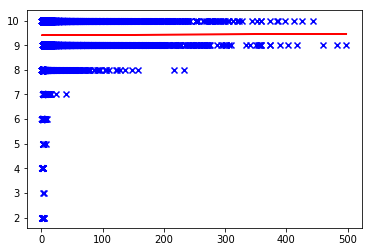

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

X = number_of_reviews_nonan.reshape(-1, 1)
Y = review_scores_value_nonan
model.fit(X, Y)
model.coef_
predicted_Y = model.predict(X)
plt.scatter(X, Y, c='blue', marker='x')
plt.plot(X, predicted_Y, c='red')
plt.show()


In [9]:
latitude = []
longitude = []
price = []

for apartment in DictReader(open('listings.csv')):
    latitude.append(apartment['latitude'])
    longitude.append(apartment['longitude'])
    price.append(apartment['price'])

len(price)

22552

In [10]:

cleaned_price = []
for p in price:
    new_price = ''
    for char in p:
        if char in ['0','1','2','3','4','5','6','7','8','9','.']:
            new_price += char
    print(new_price)
    cleaned_price.append(new_price)


60.00
17.00
90.00
26.00
42.00
180.00
70.00
120.00
90.00
45.00
49.00
129.00
70.00
98.00
160.00
65.00
90.00
90.00
197.00
70.00
90.00
60.00
130.00
100.00
44.00
62.00
55.00
40.00
25.00
52.00
39.00
80.00
80.00
50.00
43.00
40.00
36.00
119.00
90.00
42.00
56.00
50.00
48.00
160.00
70.00
88.00
55.00
88.00
90.00
55.00
200.00
80.00
49.00
55.00
130.00
90.00
120.00
37.00
52.00
44.00
102.00
29.00
84.00
80.00
69.00
185.00
49.00
155.00
66.00
70.00
53.00
70.00
92.00
75.00
80.00
48.00
114.00
60.00
506.00
50.00
82.00
80.00
60.00
70.00
130.00
69.00
75.00
68.00
125.00
70.00
89.00
59.00
96.00
75.00
55.00
55.00
70.00
31.00
40.00
81.00
52.00
100.00
36.00
88.00
29.00
100.00
161.00
65.00
70.00
29.00
80.00
49.00
49.00
59.00
30.00
23.00
40.00
35.00
70.00
80.00
42.00
96.00
75.00
96.00
76.00
46.00
296.00
244.00
20.00
50.00
59.00
75.00
170.00
39.00
39.00
64.00
35.00
100.00
375.00
29.00
32.00
45.00
120.00
25.00
59.00
86.00
45.00
100.00
80.00
50.00
49.00
55.00
79.00
75.00
49.00
38.00
65.00
75.00
75.00
38.00
89.00
74.00

65.00
80.00
60.00
39.00
110.00
39.00
75.00
38.00
29.00
55.00
71.00
93.00
99.00
98.00
33.00
22.00
99.00
25.00
50.00
99.00
120.00
300.00
45.00
125.00
39.00
65.00
235.00
43.00
60.00
40.00
50.00
40.00
54.00
65.00
180.00
180.00
42.00
59.00
54.00
90.00
69.00
169.00
100.00
95.00
52.00
60.00
59.00
199.00
75.00
35.00
59.00
45.00
49.00
35.00
23.00
34.00
70.00
30.00
47.00
60.00
30.00
100.00
45.00
95.00
65.00
150.00
300.00
40.00
80.00
30.00
90.00
60.00
107.00
50.00
55.00
69.00
65.00
50.00
40.00
30.00
28.00
60.00
51.00
45.00
49.00
30.00
49.00
75.00
89.00
35.00
85.00
32.00
77.00
35.00
60.00
130.00
100.00
35.00
60.00
67.00
50.00
42.00
20.00
100.00
25.00
90.00
55.00
90.00
55.00
50.00
150.00
94.00
229.00
40.00
65.00
30.00
70.00
70.00
70.00
75.00
91.00
40.00
35.00
45.00
22.00
31.00
45.00
50.00
30.00
59.00
50.00
60.00
78.00
68.00
50.00
55.00
25.00
60.00
45.00
48.00
70.00
58.00
390.00
49.00
64.00
63.00
50.00
59.00
79.00
28.00
43.00
60.00
65.00
109.00
75.00
50.00
120.00
30.00
70.00
55.00
15.00
36.00
70.00


60.00
65.00
48.00
26.00
48.00
130.00
20.00
35.00
71.00
30.00
22.00
55.00
66.00
75.00
40.00
75.00
57.00
70.00
28.00
100.00
280.00
170.00
55.00
40.00
64.00
45.00
69.00
58.00
53.00
59.00
35.00
38.00
79.00
65.00
118.00
380.00
39.00
80.00
99.00
25.00
36.00
40.00
49.00
70.00
52.00
180.00
50.00
80.00
70.00
50.00
43.00
50.00
55.00
39.00
75.00
130.00
35.00
50.00
90.00
120.00
28.00
100.00
90.00
60.00
40.00
39.00
67.00
60.00
60.00
80.00
199.00
80.00
30.00
35.00
85.00
30.00
32.00
60.00
70.00
59.00
125.00
28.00
115.00
30.00
33.00
39.00
62.00
34.00
25.00
40.00
25.00
59.00
95.00
80.00
49.00
25.00
45.00
40.00
49.00
67.00
43.00
34.00
60.00
50.00
51.00
31.00
100.00
39.00
35.00
160.00
59.00
45.00
50.00
25.00
43.00
61.00
51.00
66.00
45.00
27.00
90.00
42.00
70.00
69.00
35.00
67.00
43.00
40.00
35.00
23.00
70.00
23.00
40.00
59.00
30.00
59.00
49.00
100.00
39.00
52.00
45.00
45.00
40.00
45.00
80.00
40.00
23.00
100.00
25.00
80.00
30.00
42.00
21.00
68.00
45.00
60.00
95.00
65.00
55.00
90.00
59.00
180.00
75.00
120.

30.00
35.00
100.00
40.00
57.00
75.00
110.00
25.00
45.00
90.00
46.00
32.00
45.00
48.00
64.00
90.00
50.00
44.00
85.00
129.00
50.00
19.00
20.00
150.00
48.00
30.00
33.00
20.00
18.00
50.00
40.00
60.00
70.00
42.00
48.00
57.00
55.00
35.00
20.00
25.00
120.00
169.00
23.00
25.00
33.00
25.00
16.00
17.00
54.00
70.00
29.00
37.00
35.00
50.00
40.00
25.00
25.00
30.00
35.00
50.00
22.00
80.00
28.00
56.00
45.00
120.00
170.00
85.00
17.00
35.00
70.00
40.00
80.00
100.00
60.00
129.00
84.00
25.00
78.00
74.00
80.00
90.00
87.00
49.00
30.00
240.00
70.00
30.00
19.00
25.00
14.00
30.00
38.00
30.00
10.00
30.00
49.00
120.00
15.00
97.00
40.00
89.00
21.00
20.00
22.00
45.00
75.00
90.00
50.00
26.00
29.00
50.00
30.00
55.00
20.00
24.00
30.00
24.00
40.00
24.00
45.00
30.00
60.00
110.00
24.00
100.00
25.00
35.00
49.00
57.00
40.00
20.00
65.00
45.00
26.00
38.00
30.00
30.00
20.00
25.00
59.00
40.00
95.00
55.00
29.00
15.00
25.00
120.00
38.00
25.00
49.00
40.00
44.00
45.00
45.00
80.00
20.00
27.00
35.00
65.00
45.00
35.00
26.00
52.00
1

60.00
35.00
110.00
36.00
50.00
53.00
12.00
40.00
53.00
70.00
41.00
35.00
10.00
25.00
50.00
70.00
48.00
67.00
150.00
39.00
30.00
68.00
60.00
70.00
79.00
35.00
55.00
70.00
52.00
27.00
60.00
92.00
40.00
44.00
45.00
40.00
50.00
70.00
55.00
20.00
18.00
55.00
30.00
50.00
20.00
56.00
60.00
80.00
60.00
52.00
35.00
30.00
30.00
70.00
30.00
40.00
24.00
65.00
40.00
80.00
32.00
210.00
45.00
89.00
30.00
25.00
50.00
46.00
125.00
21.00
160.00
32.00
120.00
25.00
50.00
40.00
70.00
30.00
77.00
39.00
25.00
40.00
25.00
40.00
179.00
37.00
30.00
37.00
100.00
40.00
30.00
45.00
95.00
60.00
22.00
39.00
35.00
25.00
45.00
50.00
110.00
20.00
25.00
49.00
45.00
80.00
25.00
49.00
35.00
25.00
50.00
26.00
65.00
25.00
42.00
80.00
20.00
85.00
65.00
85.00
50.00
75.00
75.00
88.00
25.00
35.00
65.00
90.00
29.00
60.00
53.00
99.00
60.00
60.00
44.00
47.00
30.00
104.00
80.00
20.00
15.00
48.00
21.00
39.00
35.00
90.00
50.00
23.00
60.00
28.00
60.00
22.00
30.00
35.00
55.00
49.00
89.00
34.00
29.00
50.00
50.00
50.00
43.00
39.00
30.00


25.00
70.00
55.00
45.00
50.00
39.00
27.00
20.00
59.00
30.00
85.00
44.00
35.00
49.00
84.00
60.00
45.00
40.00
24.00
70.00
28.00
260.00
260.00
100.00
35.00
35.00
50.00
240.00
75.00
76.00
40.00
28.00
25.00
44.00
60.00
250.00
240.00
160.00
55.00
40.00
229.00
60.00
110.00
69.00
80.00
40.00
65.00
16.00
47.00
110.00
18.00
78.00
40.00
95.00
45.00
30.00
50.00
60.00
40.00
23.00
60.00
500.00
80.00
65.00
69.00
50.00
17.00
26.00
50.00
69.00
300.00
35.00
43.00
22.00
39.00
55.00
90.00
240.00
160.00
59.00
28.00
70.00
45.00
65.00
40.00
45.00
120.00
30.00
65.00
37.00
22.00
40.00
35.00
85.00
42.00
22.00
50.00
50.00
120.00
36.00
185.00
140.00
50.00
25.00
95.00
25.00
38.00
63.00
46.00
55.00
35.00
36.00
35.00
43.00
50.00
38.00
85.00
94.00
27.00
65.00
150.00
30.00
100.00
62.00
45.00
350.00
59.00
17.00
110.00
29.00
36.00
50.00
21.00
95.00
100.00
64.00
48.00
40.00
35.00
49.00
43.00
24.00
20.00
40.00
135.00
62.00
32.00
48.00
35.00
40.00
22.00
35.00
150.00
35.00
95.00
35.00
28.00
30.00
43.00
65.00
55.00
76.00
70.

22.00
120.00
120.00
48.00
40.00
25.00
25.00
29.00
39.00
40.00
60.00
65.00
60.00
27.00
35.00
30.00
77.00
64.00
120.00
45.00
150.00
35.00
27.00
40.00
29.00
99.00
55.00
100.00
30.00
78.00
30.00
15.00
12.00
19.00
25.00
45.00
60.00
24.00
49.00
25.00
25.00
25.00
100.00
23.00
55.00
95.00
139.00
45.00
79.00
48.00
40.00
49.00
65.00
55.00
85.00
58.00
25.00
35.00
27.00
40.00
88.00
75.00
92.00
33.00
40.00
95.00
85.00
24.00
185.00
30.00
40.00
190.00
27.00
60.00
40.00
100.00
50.00
90.00
35.00
39.00
60.00
19.00
75.00
80.00
42.00
37.00
177.00
25.00
30.00
50.00
45.00
37.00
45.00
35.00
85.00
55.00
30.00
20.00
38.00
34.00
70.00
34.00
89.00
33.00
31.00
110.00
130.00
33.00
55.00
120.00
70.00
135.00
20.00
85.00
50.00
45.00
89.00
45.00
69.00
64.00
95.00
70.00
97.00
19.00
65.00
90.00
150.00
26.00
50.00
70.00
35.00
23.00
59.00
25.00
169.00
29.00
83.00
30.00
28.00
68.00
35.00
29.00
139.00
150.00
20.00
50.00
75.00
30.00
50.00
15.00
25.00
20.00
60.00
52.00
275.00
28.00
50.00
39.00
35.00
20.00
39.00
60.00
36.00
11

49.00
20.00
32.00
11.00
50.00
70.00
35.00
50.00
70.00
35.00
48.00
190.00
25.00
85.00
24.00
37.00
85.00
55.00
14.00
21.00
33.00
95.00
40.00
40.00
55.00
39.00
59.00
25.00
50.00
50.00
28.00
113.00
90.00
14.00
39.00
35.00
74.00
50.00
54.00
25.00
35.00
50.00
45.00
35.00
35.00
45.00
32.00
42.00
45.00
49.00
30.00
110.00
38.00
35.00
45.00
37.00
30.00
54.00
140.00
30.00
89.00
35.00
20.00
59.00
35.00
139.00
50.00
55.00
40.00
160.00
52.00
25.00
54.00
40.00
64.00
31.00
50.00
110.00
70.00
19.00
35.00
95.00
66.00
200.00
60.00
45.00
60.00
50.00
41.00
41.00
70.00
39.00
41.00
52.00
52.00
30.00
50.00
119.00
49.00
60.00
30.00
69.00
28.00
60.00
45.00
99.00
38.00
70.00
80.00
33.00
53.00
49.00
100.00
60.00
84.00
50.00
70.00
25.00
42.00
20.00
35.00
29.00
100.00
58.00
78.00
29.00
25.00
50.00
59.00
80.00
41.00
70.00
139.00
40.00
52.00
138.00
21.00
35.00
27.00
55.00
36.00
22.00
100.00
35.00
30.00
55.00
120.00
150.00
20.00
21.00
189.00
40.00
75.00
55.00
80.00
23.00
59.00
18.00
90.00
24.00
35.00
45.00
30.00
44.00

20.00
40.00
15.00
32.00
80.00
25.00
23.00
35.00
51.00
30.00
70.00
35.00
120.00
35.00
30.00
45.00
60.00
45.00
20.00
65.00
80.00
50.00
44.00
25.00
50.00
60.00
149.00
30.00
39.00
50.00
16.00
35.00
50.00
24.00
35.00
69.00
39.00
43.00
100.00
50.00
93.00
28.00
110.00
48.00
80.00
99.00
25.00
18.00
70.00
26.00
52.00
85.00
170.00
33.00
55.00
26.00
55.00
42.00
75.00
228.00
0.00
30.00
55.00
50.00
40.00
28.00
40.00
50.00
24.00
32.00
34.00
25.00
23.00
55.00
200.00
100.00
68.00
85.00
24.00
23.00
48.00
47.00
50.00
21.00
80.00
85.00
28.00
30.00
70.00
34.00
100.00
14.00
50.00
50.00
48.00
70.00
44.00
15.00
37.00
25.00
350.00
100.00
35.00
18.00
60.00
90.00
20.00
35.00
65.00
75.00
40.00
33.00
22.00
30.00
20.00
45.00
40.00
149.00
55.00
18.00
400.00
72.00
45.00
27.00
50.00
119.00
46.00
50.00
40.00
29.00
56.00
40.00
23.00
39.00
35.00
40.00
26.00
32.00
50.00
42.00
39.00
20.00
25.00
60.00
20.00
139.00
35.00
60.00
20.00
35.00
88.00
30.00
55.00
55.00
30.00
20.00
70.00
50.00
44.00
50.00
19.00
90.00
60.00
32.00
34

80.00
30.00
25.00
100.00
109.00
18.00
100.00
33.00
35.00
35.00
30.00
55.00
20.00
20.00
89.00
75.00
45.00
25.00
26.00
39.00
75.00
33.00
33.00
45.00
70.00
35.00
70.00
40.00
25.00
30.00
28.00
59.00
130.00
135.00
60.00
15.00
45.00
39.00
30.00
37.00
48.00
89.00
80.00
12.00
32.00
85.00
120.00
85.00
20.00
69.00
60.00
40.00
51.00
28.00
65.00
40.00
60.00
39.00
60.00
75.00
80.00
120.00
148.00
75.00
20.00
80.00
58.00
22.00
60.00
150.00
32.00
40.00
70.00
120.00
30.00
60.00
40.00
59.00
60.00
21.00
39.00
15.00
94.00
170.00
65.00
100.00
35.00
46.00
50.00
20.00
35.00
45.00
47.00
90.00
45.00
99.00
80.00
28.00
111.00
85.00
300.00
38.00
30.00
25.00
50.00
50.00
16.00
30.00
63.00
120.00
45.00
20.00
30.00
40.00
29.00
70.00
85.00
69.00
50.00
85.00
45.00
69.00
300.00
35.00
40.00
100.00
50.00
30.00
49.00
35.00
33.00
52.00
30.00
39.00
60.00
35.00
42.00
45.00
120.00
53.00
11.00
120.00
100.00
35.00
35.00
25.00
55.00
29.00
22.00
25.00
20.00
90.00
40.00
69.00
350.00
45.00
35.00
80.00
80.00
65.00
15.00
40.00
90.00
3

50.00
80.00
40.00
65.00
40.00
60.00
20.00
50.00
25.00
65.00
100.00
35.00
52.00
129.00
159.00
30.00
90.00
50.00
150.00
35.00
32.00
80.00
20.00
50.00
65.00
55.00
149.00
40.00
60.00
150.00
55.00
29.00
85.00
35.00
25.00
59.00
145.00
16.00
130.00
195.00
50.00
29.00
55.00
25.00
44.00
30.00
20.00
75.00
100.00
45.00
50.00
70.00
60.00
28.00
41.00
25.00
40.00
24.00
40.00
30.00
50.00
32.00
27.00
32.00
32.00
49.00
45.00
70.00
45.00
69.00
55.00
48.00
50.00
15.00
50.00
19.00
20.00
30.00
20.00
100.00
45.00
22.00
14.00
85.00
65.00
40.00
37.00
23.00
38.00
65.00
23.00
38.00
120.00
58.00
23.00
140.00
85.00
39.00
25.00
29.00
50.00
26.00
32.00
29.00
150.00
60.00
57.00
28.00
75.00
50.00
85.00
69.00
100.00
45.00
42.00
90.00
35.00
35.00
35.00
185.00
59.00
139.00
35.00
29.00
28.00
145.00
145.00
95.00
135.00
135.00
105.00
105.00
35.00
55.00
50.00
50.00
25.00
29.00
88.00
50.00
8.00
18.00
185.00
185.00
79.00
54.00
30.00
115.00
72.00
85.00
59.00
75.00
30.00
120.00
15.00
35.00
65.00
85.00
200.00
65.00
35.00
55.00
4

15.00
49.00
13.00
45.00
35.00
109.00
69.00
20.00
60.00
38.00
100.00
53.00
50.00
40.00
35.00
54.00
50.00
120.00
65.00
38.00
30.00
41.00
32.00
129.00
110.00
95.00
30.00
30.00
39.00
55.00
29.00
40.00
70.00
106.00
48.00
50.00
97.00
125.00
14.00
42.00
75.00
35.00
75.00
30.00
50.00
100.00
55.00
50.00
70.00
59.00
28.00
25.00
30.00
40.00
75.00
80.00
70.00
110.00
90.00
44.00
35.00
46.00
250.00
51.00
48.00
60.00
25.00
60.00
30.00
40.00
25.00
30.00
33.00
280.00
95.00
30.00
30.00
60.00
21.00
50.00
30.00
30.00
45.00
100.00
30.00
15.00
42.00
150.00
140.00
60.00
85.00
35.00
45.00
45.00
45.00
79.00
60.00
75.00
30.00
300.00
40.00
23.00
99.00
40.00
13.00
30.00
18.00
35.00
32.00
19.00
80.00
25.00
66.00
27.00
50.00
50.00
40.00
30.00
35.00
38.00
75.00
33.00
42.00
38.00
200.00
40.00
40.00
24.00
22.00
40.00
32.00
140.00
70.00
150.00
160.00
30.00
33.00
170.00
200.00
44.00
60.00
27.00
27.00
27.00
90.00
29.00
65.00
65.00
44.00
55.00
30.00
25.00
100.00
42.00
39.00
50.00
100.00
55.00
15.00
55.00
20.00
32.00
25.00

25.00
40.00
40.00
35.00
145.00
17.00
55.00
50.00
44.00
25.00
70.00
50.00
59.00
30.00
40.00
37.00
40.00
62.00
20.00
70.00
32.00
90.00
50.00
45.00
80.00
24.00
18.00
22.00
55.00
32.00
95.00
150.00
43.00
299.00
22.00
35.00
39.00
69.00
40.00
50.00
25.00
30.00
25.00
60.00
85.00
50.00
28.00
77.00
50.00
18.00
90.00
59.00
85.00
90.00
69.00
50.00
99.00
30.00
98.00
110.00
25.00
40.00
30.00
60.00
50.00
25.00
20.00
35.00
25.00
50.00
41.00
65.00
29.00
150.00
86.00
120.00
37.00
65.00
60.00
35.00
75.00
38.00
38.00
85.00
47.00
99.00
25.00
49.00
75.00
30.00
40.00
25.00
70.00
17.00
80.00
25.00
60.00
99.00
50.00
30.00
65.00
70.00
25.00
220.00
90.00
35.00
42.00
49.00
42.00
80.00
60.00
28.00
30.00
22.00
45.00
45.00
150.00
30.00
30.00
599.00
399.00
100.00
35.00
105.00
95.00
70.00
30.00
26.00
21.00
150.00
23.00
60.00
30.00
30.00
19.00
40.00
29.00
90.00
39.00
100.00
60.00
20.00
85.00
99.00
45.00


convert to np arrays

In [11]:
latitude_np = np.array(latitude, dtype='float')
longitude_np = np.array(longitude, dtype='float')
price_np = np.array(cleaned_price, dtype='float')

In [12]:
np.max(price_np)

9000.0

In [13]:
latitude_np.shape
longitude_np.shape

(22552,)

In [14]:
price_normalized = price_np / 2000
price_normalized

array([0.03  , 0.0085, 0.045 , ..., 0.0425, 0.0495, 0.0225])

/Users/falkvandermeirsch/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


<function matplotlib.pyplot.show(*args, **kw)>

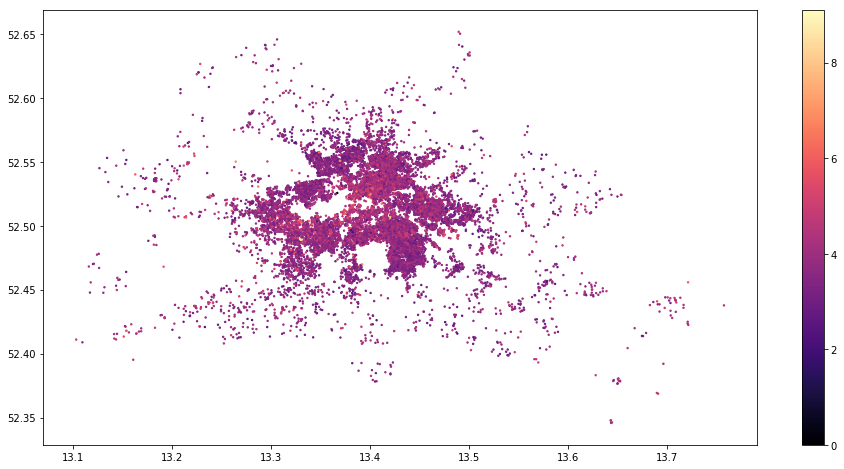

In [18]:
from matplotlib.pyplot import colorbar

plt.figure(figsize=(16,8))
plt.scatter(longitude_np, latitude_np, c=np.log(price_np), cmap='magma', s=2)
colorbar()
plt.show()

In [21]:
dist_from_center = np.array(22552)
dist_from_center


array(22552)

The center of Berlin is defined as the big star in the middel of Tiergarten. Coordinates: 52.514504, 13.350147

In [26]:
center_lat = 52.51450
center_long = 13.350147

In [28]:

dist_from_center = ((latitude_np - center_lat) ** 2 + (longitude_np - center_long) ** 2) ** (1/2)
dist_from_center

array([0.05610967, 0.06416279, 0.07047782, ..., 0.06422625, 0.02922824,
       0.08473569])

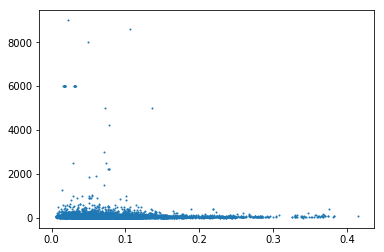

In [39]:
plt.scatter(dist_from_center, price_np, s=1)

In [33]:
model = LinearRegression()
X = dist_from_center
X = X.reshape(-1, 1)
Y = price_np
model.fit(X, Y)
model.coef_

array([-274.68899869])

In [34]:
Y_pred = model.predict(X)

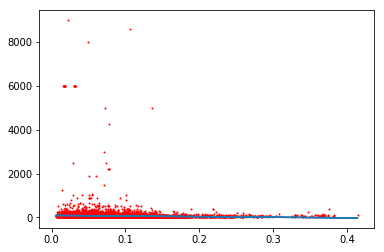

In [43]:
plt.figure()
plt.scatter(X,Y, c='red', s=1)
plt.plot(X, Y_pred)
plt.show()

In [44]:
linear_score = model.score(X, Y)
print(f'the score is {linear_score}')

the score is 0.0025261772392959347


We look for the center of gravity where the price is measured as weight

In [78]:
y_coords = [y / 100 for y in range(5242, 5257)]
x_coords = [x / 100 for x in range(1327, 1350)]
print(len(x_coords))
print(len(y_coords))

23
15


In [99]:
total_distance = np.empty([len(y_coords), len(x_coords)])
for i, long in enumerate(x_coords):
    for j, lat in enumerate(y_coords):
        tot_dist = 0
        for app_lat, app_long, app_price in zip(latitude_np, longitude_np, price_np):
            tot_dist += (((app_lat - lat) ** 2 + (app_long - long) ** 2) ** (1/2)) * app_price
        total_distance[j,i] = tot_dist
total_distance

array([[246203.29114304, 235028.86038903, 224367.02143584,
        214290.78420621, 204883.35120142, 196231.10113866,
        188414.26089356, 181502.21981748, 175548.2909291 ,
        170599.31959284, 166698.55351162, 163889.3169847 ,
        162204.17050827, 161677.80131797, 162338.43241902,
        164201.47589434, 167270.07921131, 171526.81065457,
        176929.74260408, 183408.61794454, 190871.19295114,
        199218.44960527, 208354.90878685],
       [237655.93420989, 226043.08244123, 214925.32804652,
        204383.72382711, 194516.15443135, 185428.4120782 ,
        177208.72802024, 169937.15131386, 163669.33849126,
        158452.21986842, 154326.16091606, 151332.4152706 ,
        149513.55063155, 148906.36704831, 149545.80617451,
        151461.29547758, 154671.49993786, 159168.34593286,
        164904.22823663, 171790.66662721, 179712.28224845,
        188544.55674853, 198172.70602098],
       [229796.69008434, 217734.62130611, 206143.54773892,
        195113.98363868, 1847

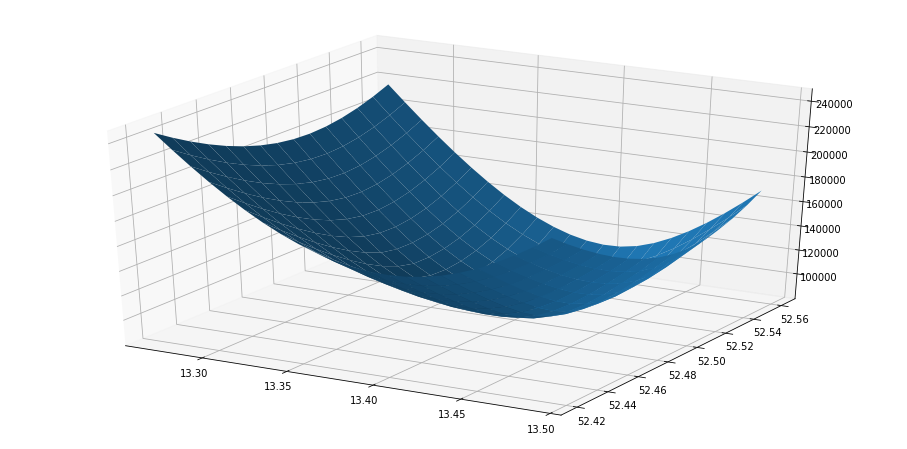

In [100]:
from mpl_toolkits.mplot3d import Axes3D

hf = plt.figure(figsize=(16,8))
ha = hf.add_subplot(111, projection='3d')

X, Y = np.meshgrid(x_coords, y_coords)  # `plot_surface` expects `x` and `y` data to be 2D
ha.plot_surface(X, Y, total_distance)

plt.show()

In [102]:
print(np.min(total_distance))
print(np.argmin(total_distance, axis=0))
print(np.argmin(total_distance, axis=1))
print(x_coords[13])
print(y_coords[9])

82299.74624840032
[9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9 9]
[13 13 13 13 13 13 13 14 13 13 13 13 13 13 13]
13.4
52.51


In [163]:
from sklearn import model_selection
print(longitude_np.shape)
print(latitude_np.shape)
print(price_np.shape)
X = np.append(longitude_np.reshape(-1,1), latitude_np.reshape(-1,1), axis=1)
print(X.shape)
Y = price_np

X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=0.2, random_state=7)

(22552,)
(22552,)
(22552,)
(22552, 2)


In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X_train, Y_train = make_regression(n_features=2)
regr = RandomForestRegressor(n_estimators=2)

regr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=2, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [170]:
pred_Y = regr.predict(X_train)

In [166]:
regr.score(X_train, Y_train)

0.9852578406730974

In [176]:
from sklearn.metrics import accuracy_score

print(Y_train)
print(pred_Y)

accuracy = accuracy_score(Y_train, pred_Y)
print(f'Mean accuracy score: {accuracy:.3}')

[ -41.91033383   67.19472384 -224.99660907   37.77489954  -51.34424332
  -75.40864496  -84.69430764    6.53914309   58.42724908 -138.92989192
    2.83319076  -95.39866468  -26.61907532  -12.25947817   88.01175718
   34.92333307  196.63817115 -144.43148082 -107.20066365   80.53045455
  148.27418076  115.68732737 -119.66975424   14.85449773  -20.26672839
  131.85538612   24.6839887   -20.81401624   94.90381742  106.04256259
   95.47837013   45.28043576  -78.70253198  -95.87284291  -20.62206984
    7.9227818   113.50801466  -12.94246332  143.60691585   56.86277028
  119.46466465  -82.61460931   91.03275778  138.04467589  -73.90017758
  110.597469    -76.5589997    26.68714612   -3.94002926   19.1205651
   -6.80826497   82.32086015 -143.67073279 -137.93063053  -96.20429894
  152.36302042   46.47634692  215.5236534    26.74453993  107.87565226
   93.25574564  -63.58230583  -65.02221304  114.59196529   -8.41793636
   -7.04198801   74.67576505 -150.62994893   55.03197648   57.30446307
   16.2

ValueError: continuous is not supported

In [167]:
pred_Y = regr.predict(X_validation)

In [168]:
regr.score(X_validation, Y_validation)

-0.6782609882334827

In [172]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(Y_train, pred_Y)
print(f'Mean accuracy score: {accuracy:.3}')

ValueError: continuous is not supported